# Criando Nomes

In [1]:
import pandas as pd
import html5lib

In [2]:
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m")
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f")

In [3]:
nomes_m.head()

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M


In [4]:
nomes_f.head()

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F


In [5]:
total_alunos = len(nomes_f) + len(nomes_m)
print(f"Quantidade total de nomes: {total_alunos}")

Quantidade total de nomes: 400


In [6]:
frames = [nomes_m, nomes_f]

In [7]:
frames

[          nome  regiao     freq  rank sexo
 0         JOSE       0  5732508     1    M
 1         JOAO       0  2971935     2    M
 2      ANTONIO       0  2567494     3    M
 3    FRANCISCO       0  1765197     4    M
 4       CARLOS       0  1483121     5    M
 ..         ...     ...      ...   ...  ...
 195     WALTER       0    67207   196    M
 196    ARLINDO       0    66669   197    M
 197    MICHAEL       0    65736   198    M
 198     ALVARO       0    65444   199    M
 199    GEOVANE       0    65435   200    M
 
 [200 rows x 5 columns],
           nome  regiao      freq  rank sexo
 0        MARIA       0  11694738     1    F
 1          ANA       0   3079729     2    F
 2    FRANCISCA       0    721637     3    F
 3      ANTONIA       0    588783     4    F
 4      ADRIANA       0    565621     5    F
 ..         ...     ...       ...   ...  ...
 195     ROSANE       0     82203   196    F
 196    IVONETE       0     81878   197    F
 197    LUCIANE       0     81230   198 

In [8]:
nomes = pd.concat(frames)["nome"].to_frame()
nomes

,nome
0,JOSE
1,JOAO
2,ANTONIO
3,FRANCISCO
4,CARLOS
...,...
195,ROSANE
196,IVONETE
197,LUCIANE
198,ISADORA


In [9]:
nomes.sample(5)

,nome
73,JANAINA
173,JAILSON
124,CESAR
42,MARLENE
37,ROSANGELA


# Incluindo ID dos alunos

In [10]:
import numpy as np

np.random.seed(42)

In [11]:
nomes["id"] = np.random.permutation(len(nomes)) + 1
nomes.sample(5)

,nome,id
85,HELENA,342
39,VITOR,142
11,CAMILA,113
199,GEOVANE,303
35,CARLA,358


In [12]:
dominios = ["@seudominio.com", "@dominando.com.br", "@apenasumdominio.com"]
nomes['dominio'] = np.random.choice(dominios, len(nomes))

In [13]:
nomes.sample(5)

,nome,id,dominio
0,JOSE,210,@apenasumdominio.com
197,MICHAEL,355,@apenasumdominio.com
103,KATIA,139,@apenasumdominio.com
27,GUILHERME,226,@dominando.com.br
95,ANDREA,357,@seudominio.com


In [14]:
nomes["email"] = nomes["nome"].str.cat(nomes["dominio"]).str.lower()

In [15]:
nomes.sample(5)

,nome,id,dominio,email
102,MARILENE,371,@apenasumdominio.com,marilene@apenasumdominio.com
181,YURI,145,@seudominio.com,yuri@seudominio.com
86,CRISTINA,214,@dominando.com.br,cristina@dominando.com.br
185,SHEILA,360,@dominando.com.br,sheila@dominando.com.br
29,TIAGO,105,@seudominio.com,tiago@seudominio.com


In [16]:
url = "http://tabela-cursos.herokuapp.com/index.html"
cursos = pd.read_html(url)

In [17]:
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [18]:
type(cursos)

list

In [19]:
cursos = cursos[0]
type(cursos)

pandas.core.frame.DataFrame

In [20]:
cursos

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [21]:
cursos = cursos.rename(columns={"Nome do curso": "nome_do_curso"})

In [22]:
cursos.head()

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [23]:
cursos["id"] = cursos.index + 1

In [24]:
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [25]:
cursos = cursos.set_index("id")

In [26]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [27]:
nomes["matriculas"] = np.ceil(np.random.exponential(size=total_alunos)
                              * 1.5).astype(int)

In [28]:
nomes.head()

,nome,id,dominio,email,matriculas
0,JOSE,210,@apenasumdominio.com,jose@apenasumdominio.com,1
1,JOAO,281,@apenasumdominio.com,joao@apenasumdominio.com,1
2,ANTONIO,34,@apenasumdominio.com,antonio@apenasumdominio.com,1
3,FRANCISCO,211,@apenasumdominio.com,francisco@apenasumdominio.com,2
4,CARLOS,94,@seudominio.com,carlos@seudominio.com,1


In [29]:
nomes.matriculas.value_counts()

1    199
2    103
3     53
4     20
5     15
6      6
8      2
9      1
7      1
Name: matriculas, dtype: int64

In [30]:
nomes.matriculas.describe()

count    400.000000
mean       1.967500
std        1.332623
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        9.000000
Name: matriculas, dtype: float64

In [31]:
import seaborn as sns

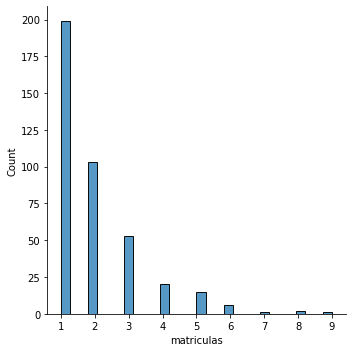

In [32]:
sns.displot(nomes.matriculas)

In [33]:
todas_matriculas = []
x = np.random.rand(20)
prop = x / sum(x)

In [34]:
for index, dados in nomes.iterrows():
    _id = dados["id"]
    num_mat = dados["matriculas"]
    for i in range(num_mat):
        mat = [_id, np.random.choice(cursos.index, p=prop)]
        todas_matriculas.append(mat)

In [35]:
matriculas = pd.DataFrame(todas_matriculas, columns=["id_aluno", 
                                                     "id_curso"])

In [36]:
matriculas.sample(10)

,id_aluno,id_curso
739,344,12
670,14,10
628,252,6
574,62,12
531,96,7
219,154,3
655,81,6
183,109,3
334,90,14
200,381,20


In [37]:
matriculas_por_curso = matriculas.groupby("id_curso").count().join(
    cursos["nome_do_curso"]).rename(columns={
    "id_aluno": "quantidade_de_alunos"})

In [38]:
nomes.matriculas.sum()

787

In [39]:
matriculas_por_curso["quantidade_de_alunos"].sum()

787

# Saída em diferenets formatos

In [40]:
matriculas_por_curso.head(4)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,11,Lógica de programação
2,46,Java para Web
3,79,C# para Web
4,67,Ruby on Rails


In [41]:
matriculas_por_curso.to_csv("matriculas_por_curso.csv", index=False)

In [42]:
pd.read_csv("matriculas_por_curso.csv").head()

,quantidade_de_alunos,nome_do_curso
0,11,Lógica de programação
1,46,Java para Web
2,79,C# para Web
3,67,Ruby on Rails
4,13,Cursos de Python


In [45]:
json = matriculas_por_curso.to_json()

In [46]:
print(json)

{"quantidade_de_alunos":{"1":11,"2":46,"3":79,"4":67,"5":13,"6":70,"7":54,"9":22,"10":22,"11":6,"12":84,"13":36,"14":78,"15":26,"16":11,"17":45,"18":11,"19":41,"20":65},"nome_do_curso":{"1":"L\u00f3gica de programa\u00e7\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","9":"TDD com Java","10":"C\u00f3digo limpo com C#","11":"Preparat\u00f3rio para certifica\u00e7\u00e3o Java","12":"Hardware b\u00e1sico","13":"Persist\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\u00e1lise de dados","16":"Estat\u00edstica b\u00e1sica","17":"Internet das coisas","18":"Programa\u00e7\u00e3o funcional","19":"Boas pr\u00e1ticas em Java","20":"Orienta\u00e7\u00e3o objetos com Java"}}


In [47]:
html = matriculas_por_curso.to_html()

In [48]:
print(html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>11</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>46</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>79</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>67</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>13</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>70</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>54</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>9</th>
      <td>22</td>
      <td>TDD com Java</td>
    </tr>
    <tr>
      <th>10</th>
      <td>22</td>
      <td>Cód

## Lendo e Escrevendo em SQL

In [54]:
from sqlalchemy import create_engine, MetaData, Table, inspect

In [56]:
engine = create_engine("sqlite:///:memory:")

In [57]:
type(engine)

sqlalchemy.engine.base.Engine

In [58]:
sql = matriculas_por_curso.to_sql("matriculas", engine)

In [64]:
inspector = inspect(engine)

In [65]:
print(inspector.get_table_names())

['matriculas']


In [69]:
query = "select * from matriculas where quantidade_de_alunos > 50"

In [70]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,3,79,C# para Web
1,4,67,Ruby on Rails
2,6,70,PHP com MySql
3,7,54,.NET para web
4,12,84,Hardware básico
5,14,78,Desenvolvendo jogos
6,20,65,Orientação objetos com Java


In [74]:
muitas_matriculas = pd.read_sql_table("matriculas", engine, columns=["quantidade_de_alunos", "nome_do_curso"])

In [75]:
muitas_matriculas.query("quantidade_de_alunos > 70")

,quantidade_de_alunos,nome_do_curso
2,79,C# para Web
10,84,Hardware básico
12,78,Desenvolvendo jogos


In [78]:
muitas_matriculas.to_sql("muitas_matriculas", engine)

ValueError: Table 'muitas_matriculas' already exists.

In [79]:
inspector = inspect(engine)
print(inspector.get_table_names())

['matriculas', 'muitas_matriculas']


## Nova turma

In [80]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,11,Lógica de programação
2,46,Java para Web
3,79,C# para Web
4,67,Ruby on Rails
5,13,Cursos de Python


In [81]:
matriculas.head()

,id_aluno,id_curso
0,210,12
1,281,13
2,34,3
3,211,2
4,211,3


In [82]:
id_do_curso = 5
proxima_turma = matriculas.query("id_curso == {}".format(id_do_curso))

In [83]:
proxima_turma.head()

,id_aluno,id_curso
20,43,5
242,306,5
314,151,5
318,11,5
332,169,5


In [84]:
nomes.sample(3)

,nome,id,dominio,email,matriculas
27,LUANA,393,@apenasumdominio.com,luana@apenasumdominio.com,1
197,MICHAEL,355,@apenasumdominio.com,michael@apenasumdominio.com,2
79,MONICA,332,@seudominio.com,monica@seudominio.com,3


In [90]:
proxima_turma.set_index("id_aluno").join(nomes.set_index("id"))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
43,5,BRUNO,@dominando.com.br,bruno@dominando.com.br,6
306,5,SANDRO,@apenasumdominio.com,sandro@apenasumdominio.com,2
151,5,CAUA,@apenasumdominio.com,caua@apenasumdominio.com,3
11,5,SIDNEI,@dominando.com.br,sidnei@dominando.com.br,3
169,5,NIVALDO,@dominando.com.br,nivaldo@dominando.com.br,1
223,5,SANDRA,@apenasumdominio.com,sandra@apenasumdominio.com,5
137,5,LARISSA,@apenasumdominio.com,larissa@apenasumdominio.com,6
108,5,LUCIA,@seudominio.com,lucia@seudominio.com,4
45,5,REGINA,@seudominio.com,regina@seudominio.com,1


In [94]:
proxima_turma = proxima_turma.set_index("id_aluno").join(
    nomes.set_index("id"))["nome"].to_frame()

In [95]:
proxima_turma.head()

,nome
id_aluno,
43,BRUNO
306,SANDRO
151,CAUA
11,SIDNEI
169,NIVALDO


In [97]:
nome_curso = cursos.loc[id_do_curso]
nome_curso

nome_do_curso    Cursos de Python
Name: 5, dtype: object

In [99]:
nome_curso = nome_curso.nome_do_curso

In [100]:
nome_curso

'Cursos de Python'

In [105]:
proxima_turma = proxima_turma.rename(
    columns={"nome": "Alunos do curso de {}".format(nome_curso)})

In [106]:
proxima_turma

,Alunos do curso de Cursos de Python
id_aluno,
43,BRUNO
306,SANDRO
151,CAUA
11,SIDNEI
169,NIVALDO
223,SANDRA
137,LARISSA
108,LUCIA
45,REGINA


# Excel

In [107]:
proxima_turma.to_excel("proxima_turma.xlsx", index=False)

In [108]:
pd.read_excel("proxima_turma.xlsx")

,Alunos do curso de Cursos de Python
0,BRUNO
1,SANDRO
2,CAUA
3,SIDNEI
4,NIVALDO
5,SANDRA
6,LARISSA
7,LUCIA
8,REGINA
9,TATIANA
